In [18]:
import pandas as pd


In [19]:
df = pd.read_csv('../data/synthetic_ipdrs.csv')

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SrcIP       2000 non-null   object
 1   DstIP       2000 non-null   object
 2   SrcPort     2000 non-null   int64 
 3   DstPort     2000 non-null   int64 
 4   Timestamp   2000 non-null   object
 5   Protocol    2000 non-null   object
 6   DataVolume  2000 non-null   int64 
 7   FraudType   1304 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


--- Initial Data Inspection ---
First 5 rows of the dataset:
             SrcIP         DstIP  SrcPort  DstPort            Timestamp  \
0   192.168.63.192    10.0.201.1     5385      443  2023-11-12 08:18:22   
1  192.168.141.215  10.0.101.136     4365       53  2023-09-01 22:26:05   
2  192.168.243.223  10.0.198.160     8851      443  2023-03-12 08:01:06   
3    192.168.21.35   10.0.142.55    36969       22  2023-04-15 05:48:09   
4  192.168.216.104    10.0.20.30     1669       80  2023-05-12 02:42:53   

  Protocol  DataVolume  FraudType  
0      UDP     8305754       DDoS  
1      UDP     9987103        NaN  
2      TCP     6062294        NaN  
3      TCP     1608877  Espionage  
4      UDP     4767985       DDoS  

Dataset Information (Data Types and Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SrcIP       2000 non-null   object
 

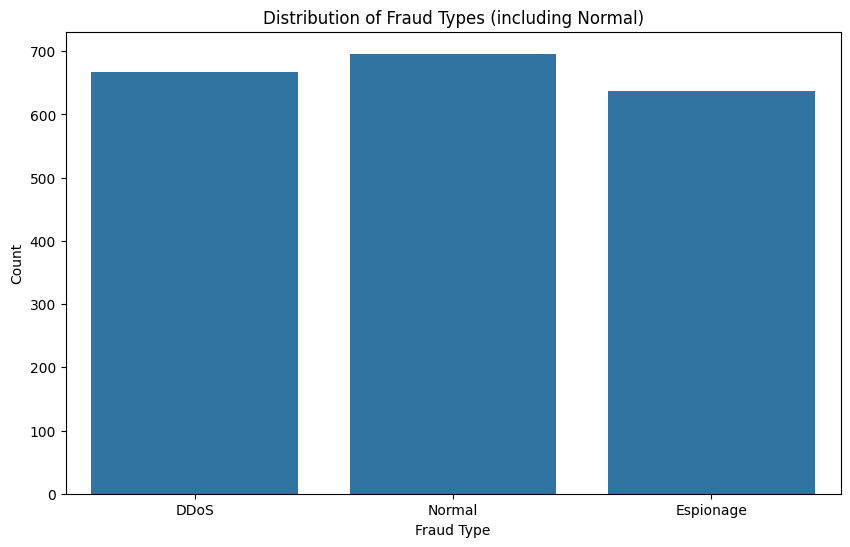


--- Feature Analysis ---


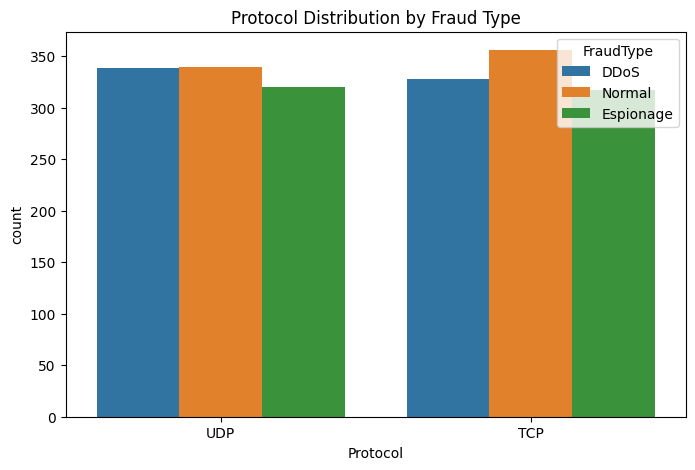

Top 10 most frequent Source IPs:
SrcIP
192.168.28.208     2
192.168.206.16     2
192.168.16.236     2
192.168.42.42      2
192.168.193.170    2
192.168.176.208    2
192.168.67.3       2
192.168.107.180    2
192.168.196.47     2
192.168.98.87      2
Name: count, dtype: int64

Top 10 most frequent Destination IPs:
DstIP
10.0.62.246     2
10.0.104.5      2
10.0.44.219     2
10.0.208.142    2
10.0.34.116     2
10.0.40.140     2
10.0.227.1      2
10.0.44.18      2
10.0.83.162     2
10.0.189.153    2
Name: count, dtype: int64

Histograms of Numerical Features:


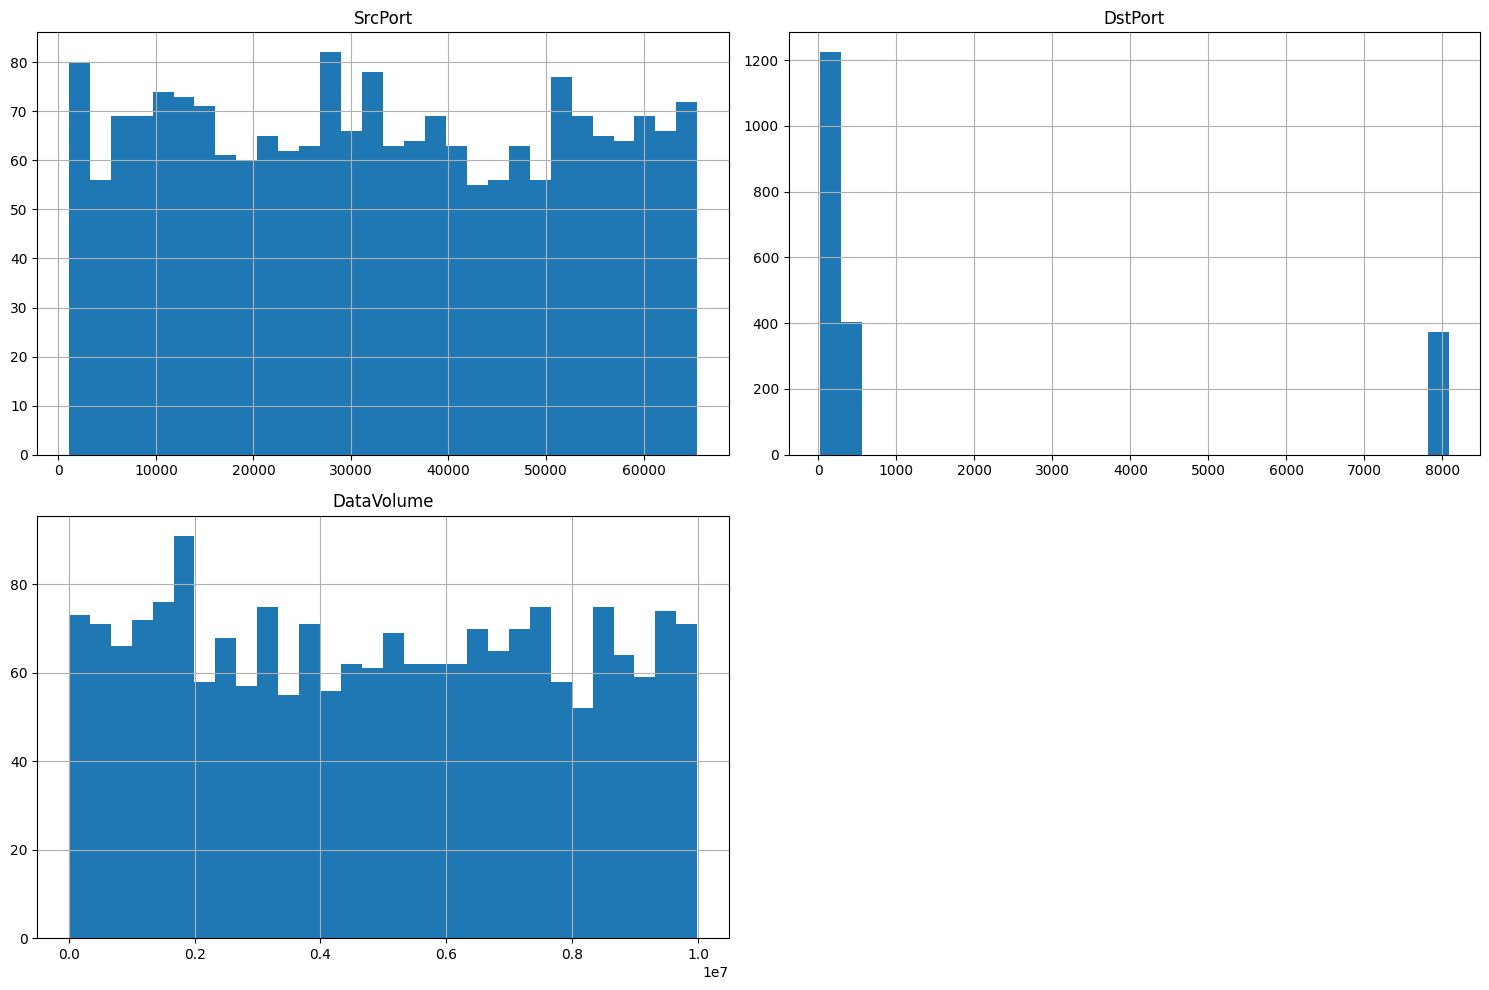

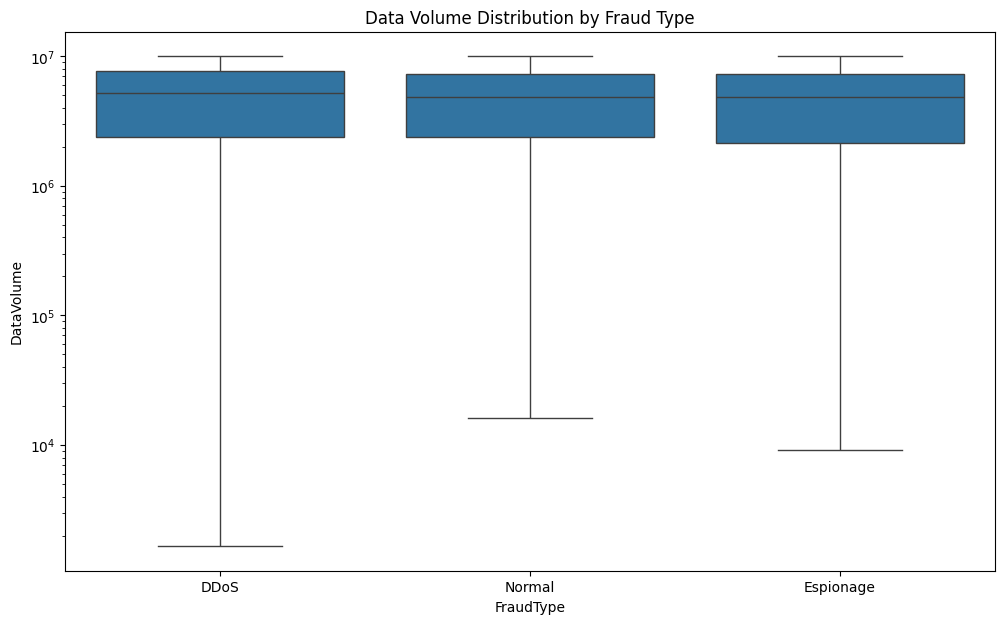


--- Temporal Analysis ---


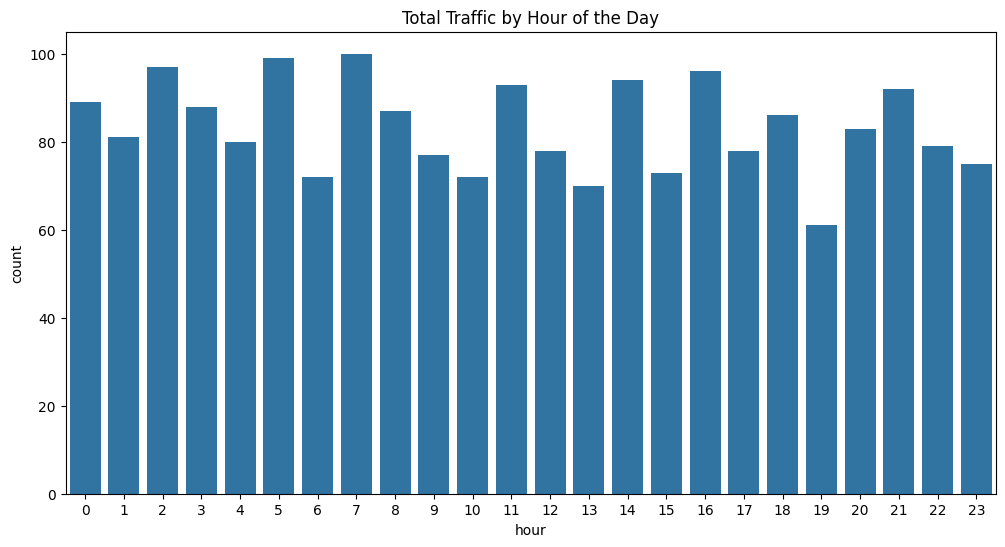

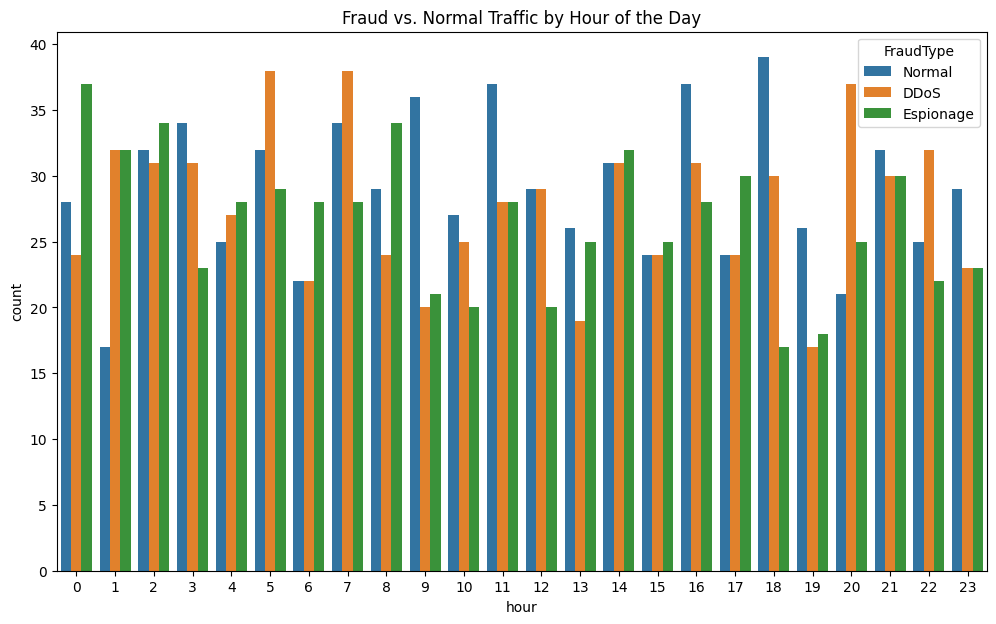

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Initial Inspection ---
print("--- Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information (Data Types and Nulls):")
df.info()
print("\nDataset Shape (Rows, Columns):")
print(df.shape)

# --- 2. Summary Statistics ---
print("\n--- Summary Statistics ---")
print("Numerical Features Summary:")
print(df.describe())
print("\nCategorical Features Summary:")
print(df.describe(include=['object']))

# --- 3. Target Variable Analysis (FraudType) ---
print("\n--- Target Variable Analysis ---")
plt.figure(figsize=(10, 6))
# Temporarily fill NaN to include 'Normal' traffic in the plot
sns.countplot(x=df['FraudType'].fillna('Normal'))
plt.title('Distribution of Fraud Types (including Normal)')
plt.xlabel('Fraud Type')
plt.ylabel('Count')
plt.show()

# --- 4. Feature Analysis ---
print("\n--- Feature Analysis ---")

# Analyze Protocol
plt.figure(figsize=(8, 5))
sns.countplot(x='Protocol', data=df, hue=df['FraudType'].fillna('Normal'))
plt.title('Protocol Distribution by Fraud Type')
plt.show()

# Analyze Top Source and Destination IPs
print("Top 10 most frequent Source IPs:")
print(df['SrcIP'].value_counts().head(10))
print("\nTop 10 most frequent Destination IPs:")
print(df['DstIP'].value_counts().head(10))

# Analyze Numerical Feature Distributions
print("\nHistograms of Numerical Features:")
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot of DataVolume by Fraud Type
plt.figure(figsize=(12, 7))
sns.boxplot(x=df['FraudType'].fillna('Normal'), y='DataVolume', data=df)
plt.title('Data Volume Distribution by Fraud Type')
plt.yscale('log') # Use a log scale if the data is heavily skewed
plt.show()

# --- 5. Temporal Analysis ---
print("\n--- Temporal Analysis ---")
# Make a copy to avoid SettingWithCopyWarning
df_temp = df.copy()

# Convert Timestamp to datetime object
df_temp['Timestamp_dt'] = pd.to_datetime(df_temp['Timestamp'])

# Extract hour of the day
df_temp['hour'] = df_temp['Timestamp_dt'].dt.hour

# Plot traffic over hours of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df_temp)
plt.title('Total Traffic by Hour of the Day')
plt.show()

# Plot fraud vs. normal traffic by hour
plt.figure(figsize=(12, 7))
sns.countplot(x='hour', hue=df_temp['FraudType'].fillna('Normal'), data=df_temp)
plt.title('Fraud vs. Normal Traffic by Hour of the Day')
plt.show()

In [9]:
# Convert the 'Timestamp' column from object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Verify the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SrcIP       2000 non-null   object        
 1   DstIP       2000 non-null   object        
 2   SrcPort     2000 non-null   int64         
 3   DstPort     2000 non-null   int64         
 4   Timestamp   2000 non-null   datetime64[ns]
 5   Protocol    2000 non-null   object        
 6   DataVolume  2000 non-null   int64         
 7   FraudType   1304 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 125.1+ KB


In [10]:
df.head()


,SrcIP,DstIP,SrcPort,DstPort,Timestamp,Protocol,DataVolume,FraudType
0,192.168.63.192,10.0.201.1,5385,443,2023-11-12 08:18:22,UDP,8305754,DDoS
1,192.168.141.215,10.0.101.136,4365,53,2023-09-01 22:26:05,UDP,9987103,NaN
2,192.168.243.223,10.0.198.160,8851,443,2023-03-12 08:01:06,TCP,6062294,NaN
3,192.168.21.35,10.0.142.55,36969,22,2023-04-15 05:48:09,TCP,1608877,Espionage
4,192.168.216.104,10.0.20.30,1669,80,2023-05-12 02:42:53,UDP,4767985,DDoS


In [11]:
# Create the 'is_fraud' column. 1 if FraudType is not null, 0 if it is.
df['is_fraud'] = df['FraudType'].notna().astype(int)

# You can also keep the original labels by filling the nulls
df['FraudType'] = df['FraudType'].fillna('Normal')

# Verify the new columns and their distribution
print("Fraud vs. Normal count:")
print(df['is_fraud'].value_counts())

print("\nFraud types breakdown:")
print(df['FraudType'].value_counts())

Fraud vs. Normal count:
is_fraud
1    1304
0     696
Name: count, dtype: int64

Fraud types breakdown:
FraudType
Normal       696
DDoS         667
Espionage    637
Name: count, dtype: int64


In [12]:
# Extract the hour of the day from the Timestamp
df['hour_of_day'] = df['Timestamp'].dt.hour

# You could also extract the day of the week if you had a larger dataset
# df['day_of_week'] = df['Timestamp'].dt.dayofweek

print(df[['Timestamp', 'hour_of_day']].head())

            Timestamp  hour_of_day
0 2023-11-12 08:18:22            8
1 2023-09-01 22:26:05           22
2 2023-03-12 08:01:06            8
3 2023-04-15 05:48:09            5
4 2023-05-12 02:42:53            2


In [13]:
# Create aggregate features based on the source IP
ip_features = df.groupby('SrcIP').agg(
    connection_count=('DstIP', 'count'),          # How many connections from this IP?
    avg_data_volume=('DataVolume', 'mean'),      # Average data sent by this IP
    port_diversity=('DstPort', 'nunique')        # How many unique ports does this IP contact?
).reset_index()

# Merge these new features back into the original dataframe
df = pd.merge(df, ip_features, on='SrcIP', how='left')

print(df[['SrcIP', 'connection_count', 'avg_data_volume', 'port_diversity']].head())

             SrcIP  connection_count  avg_data_volume  port_diversity
0   192.168.63.192                 1        8305754.0               1
1  192.168.141.215                 1        9987103.0               1
2  192.168.243.223                 1        6062294.0               1
3    192.168.21.35                 1        1608877.0               1
4  192.168.216.104                 1        4767985.0               1


In [14]:
# Convert 'Protocol' using one-hot encoding
df = pd.get_dummies(df, columns=['Protocol'], prefix='proto')

print(df.head())

             SrcIP         DstIP  SrcPort  DstPort           Timestamp  \
0   192.168.63.192    10.0.201.1     5385      443 2023-11-12 08:18:22   
1  192.168.141.215  10.0.101.136     4365       53 2023-09-01 22:26:05   
2  192.168.243.223  10.0.198.160     8851      443 2023-03-12 08:01:06   
3    192.168.21.35   10.0.142.55    36969       22 2023-04-15 05:48:09   
4  192.168.216.104    10.0.20.30     1669       80 2023-05-12 02:42:53   

   DataVolume  FraudType  is_fraud  hour_of_day  connection_count  \
0     8305754       DDoS         1            8                 1   
1     9987103     Normal         0           22                 1   
2     6062294     Normal         0            8                 1   
3     1608877  Espionage         1            5                 1   
4     4767985       DDoS         1            2                 1   

   avg_data_volume  port_diversity  proto_TCP  proto_UDP  
0        8305754.0               1      False       True  
1        9987103.0    

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Define your features (X) and target (y)
# Drop non-numeric or original columns we no longer need
X = df.drop(columns=['SrcIP', 'DstIP', 'Timestamp', 'FraudType', 'is_fraud'])
y = df['is_fraud']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Apply SMOTE to balance the training data
# Note: The 'Normal' class is the minority, so we will up-sample it.
print("Before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train_resampled.value_counts())

# 4. Scale the numerical features
# Fit the scaler ONLY on the training data to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test) # Use the same scaler to transform the test data

Before SMOTE: is_fraud
1    913
0    487
Name: count, dtype: int64
After SMOTE: is_fraud
1    913
0    913
Name: count, dtype: int64


--- Initial Data Inspection ---
First 5 rows of the dataset:
             SrcIP         DstIP  SrcPort  DstPort           Timestamp  \
0   192.168.63.192    10.0.201.1     5385      443 2023-11-12 08:18:22   
1  192.168.141.215  10.0.101.136     4365       53 2023-09-01 22:26:05   
2  192.168.243.223  10.0.198.160     8851      443 2023-03-12 08:01:06   
3    192.168.21.35   10.0.142.55    36969       22 2023-04-15 05:48:09   
4  192.168.216.104    10.0.20.30     1669       80 2023-05-12 02:42:53   

   DataVolume  FraudType  is_fraud  hour_of_day  connection_count  \
0     8305754       DDoS         1            8                 1   
1     9987103     Normal         0           22                 1   
2     6062294     Normal         0            8                 1   
3     1608877  Espionage         1            5                 1   
4     4767985       DDoS         1            2                 1   

   avg_data_volume  port_diversity  proto_TCP  proto_UDP  
0        8305754.0  

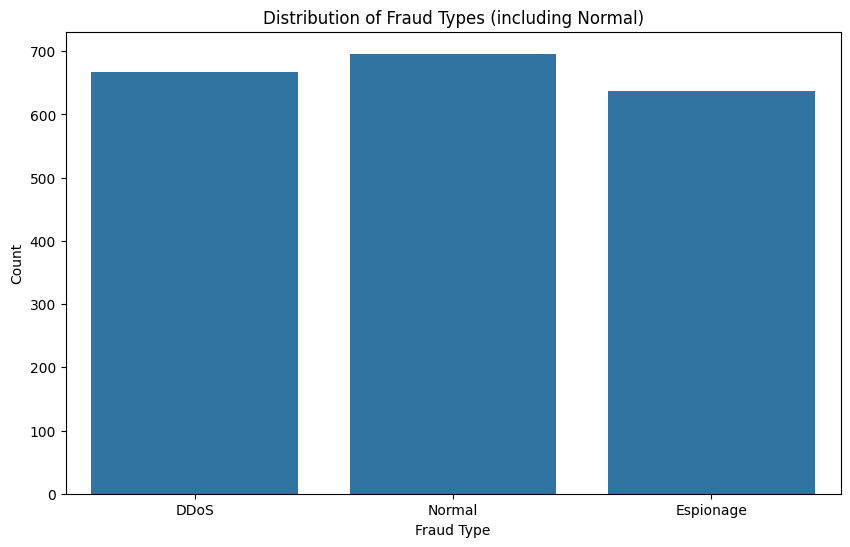


--- Feature Analysis ---


ValueError: Could not interpret value `Protocol` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Initial Inspection ---
print("--- Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information (Data Types and Nulls):")
df.info()
print("\nDataset Shape (Rows, Columns):")
print(df.shape)

# --- 2. Summary Statistics ---
print("\n--- Summary Statistics ---")
print("Numerical Features Summary:")
print(df.describe())
print("\nCategorical Features Summary:")
print(df.describe(include=['object']))

# --- 3. Target Variable Analysis (FraudType) ---
print("\n--- Target Variable Analysis ---")
plt.figure(figsize=(10, 6))
# Temporarily fill NaN to include 'Normal' traffic in the plot
sns.countplot(x=df['FraudType'].fillna('Normal'))
plt.title('Distribution of Fraud Types (including Normal)')
plt.xlabel('Fraud Type')
plt.ylabel('Count')
plt.show()

# --- 4. Feature Analysis ---
print("\n--- Feature Analysis ---")

# Analyze Protocol
plt.figure(figsize=(8, 5))
sns.countplot(x='Protocol', data=df, hue=df['FraudType'].fillna('Normal'))
plt.title('Protocol Distribution by Fraud Type')
plt.show()

# Analyze Top Source and Destination IPs
print("Top 10 most frequent Source IPs:")
print(df['SrcIP'].value_counts().head(10))
print("\nTop 10 most frequent Destination IPs:")
print(df['DstIP'].value_counts().head(10))

# Analyze Numerical Feature Distributions
print("\nHistograms of Numerical Features:")
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot of DataVolume by Fraud Type
plt.figure(figsize=(12, 7))
sns.boxplot(x=df['FraudType'].fillna('Normal'), y='DataVolume', data=df)
plt.title('Data Volume Distribution by Fraud Type')
plt.yscale('log') # Use a log scale if the data is heavily skewed
plt.show()

# --- 5. Temporal Analysis ---
print("\n--- Temporal Analysis ---")
# Make a copy to avoid SettingWithCopyWarning
df_temp = df.copy()

# Convert Timestamp to datetime object
df_temp['Timestamp_dt'] = pd.to_datetime(df_temp['Timestamp'])

# Extract hour of the day
df_temp['hour'] = df_temp['Timestamp_dt'].dt.hour

# Plot traffic over hours of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df_temp)
plt.title('Total Traffic by Hour of the Day')
plt.show()

# Plot fraud vs. normal traffic by hour
plt.figure(figsize=(12, 7))
sns.countplot(x='hour', hue=df_temp['FraudType'].fillna('Normal'), data=df_temp)
plt.title('Fraud vs. Normal Traffic by Hour of the Day')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. Initialize the XGBoost Classifier
# We use 'use_label_encoder=False' and 'eval_metric' to avoid deprecation warnings.
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train the model on your resampled and scaled training data
print("Training the XGBoost model...")
xgb_classifier.fit(X_train_scaled, y_train_resampled)
print("Model training complete.")

# 3. Make predictions on the scaled test data
y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_proba = xgb_classifier.predict_proba(X_test_scaled)[:, 1] # Probabilities for AUC

# 4. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)'])

print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"Model AUC Score: {auc:.4f}")
print("\nClassification Report:")
print(report)